# Final Project Submission

Please fill out:
* Student name: Sung Bae
* Student pace: full time
* Scheduled project review date/time: 9/17/2020 7:00 PM
* Instructor name: James Irving
* Blog post URL:


# Preparing Data

## Importing Various Libraries

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import statsmodels.formula.api as smf
import warnings
warnings.filterwarnings('ignore') # Ignores big red warning signs
 
%matplotlib inline
sns.set_style("whitegrid")

In [43]:
# importing my own python file
%load_ext autoreload
%autoreload 2
from shb import MakeModel

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Importing data

In [44]:
# import 'kc_house_data.csv'
df = pd.read_csv('kc_house_data.csv')
len(df.columns)

21

In [45]:
(df['id'].value_counts()>1).sum()
print(df.lat.shape, df.long.shape, df.price.shape)
print(df.lat.isna().sum(), df.long.isna().sum(), df.price.isna().sum())
df.info()

(21597,) (21597,) (21597,)
0 0 0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
m

<AxesSubplot:xlabel='long', ylabel='lat'>

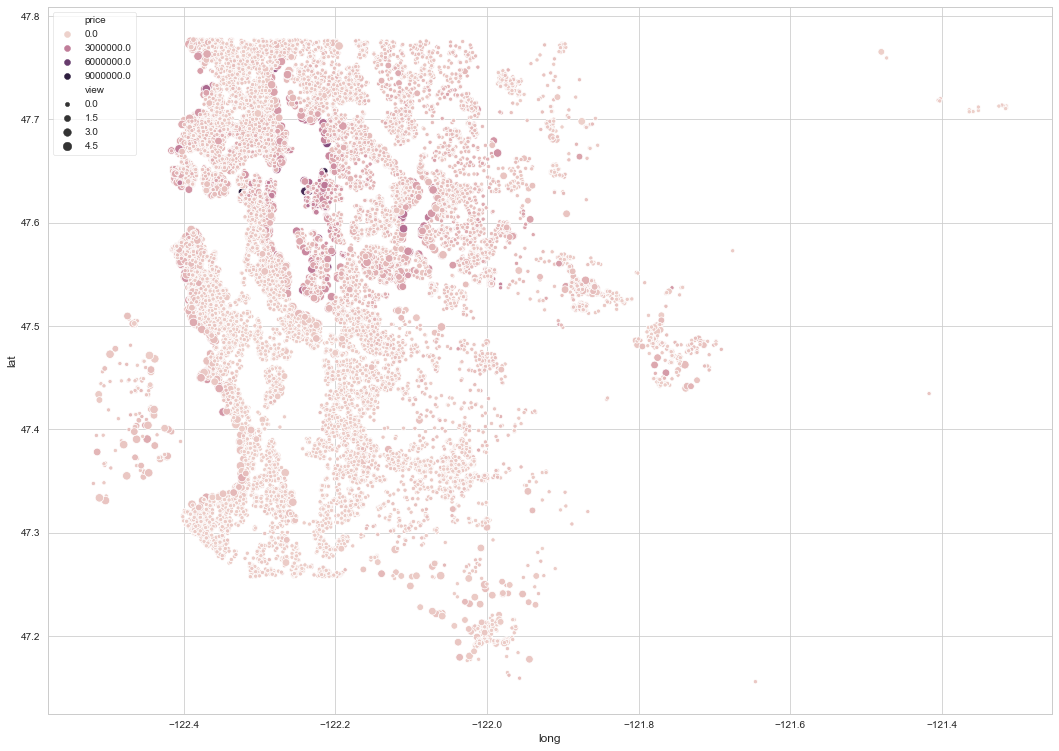

In [46]:
fig, ax = plt.subplots(figsize=(18,13))
sns.scatterplot(x='long', y='lat', size='view', hue='price', data=df)

In [47]:
# Uncomment and execute the following lines of the codes to skip determining cat/cont columns:
# predetermed categorical colums:
cat_cols = ['id', 'bedrooms','bathrooms','floors','waterfront','view','condition','grade','yr_renovated','zipcode']
# predetermed continuous colums:
cont_cols = ['price','sqft_living','sqft_lot','sqft_above','yr_built','lat','long','sqft_living15','sqft_lot15']

In [295]:
# # Determining categorical and continous columns by examining histograms
# cat_cols = []
# cont_cols = []
# for col in df.columns:
#     fig, ax = plt.subplots(figsize=(10,7))
#     try:
#         sns.distplot(df[col], bins='auto', ax=ax)
#         ax.set(title=f'{col}', xlabel=f'{col}', ylabel='frequency')
#         plt.show()
#         user_input = input('Category(0) or continuous(1): ')
#         if user_input=='1':
#             cont_cols.append(col)
#         elif user_input=='0':
#             cat_cols.append(col)
#     except:
#         print(col)

## Preprocessing continuous columns

In [48]:
# checking for any missing values
df[cont_cols].isna().sum()

price            0
sqft_living      0
sqft_lot         0
sqft_above       0
yr_built         0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

> Notice that there aren't any missing values! Yay!

In [49]:
model1 = MakeModel(df, cat_cols=cat_cols, cont_cols=cont_cols)


                    Options:
                    	1. Correlation Matrix
                    	2. Variance Inflation Factor (VIF)
                  
Choose which method you would like to determine multicolinearity variables: 1


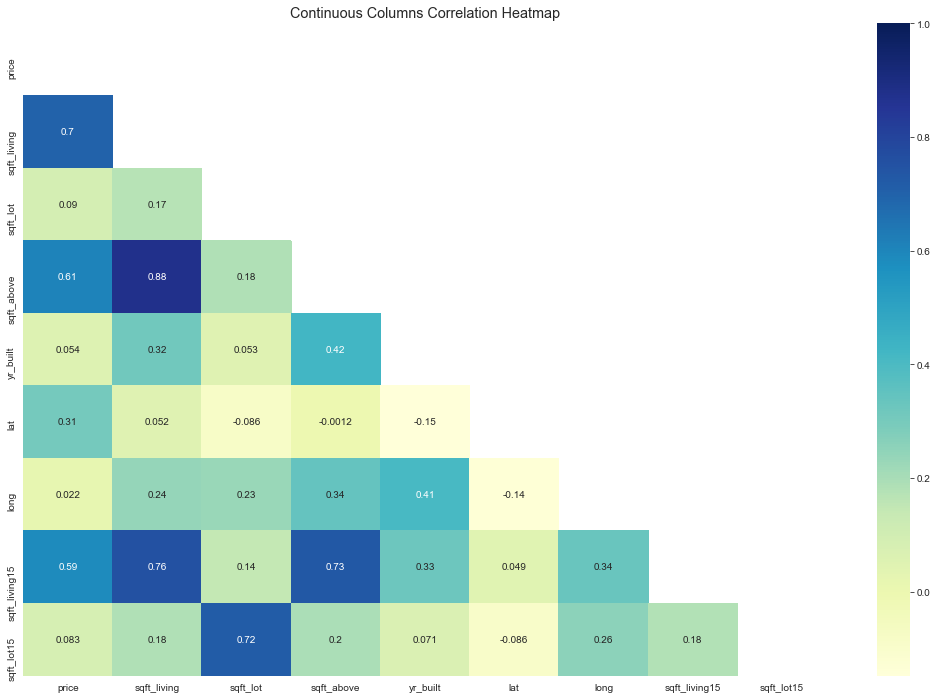

sqft_living  sqft_above       0.876448
             sqft_living15    0.756402
sqft_above   sqft_living15    0.731767
sqft_lot     sqft_lot15       0.718204
price        sqft_living      0.701917
             sqft_above       0.605368
             sqft_living15    0.585241
sqft_above   yr_built         0.424037
yr_built     long             0.409993
sqft_above   long             0.344842
dtype: float64
Write column name you would like to get rid of (Enter "x" to exit): sqft_above
'sqft_above' has been DELETED!
There are now 20 columns in the data.


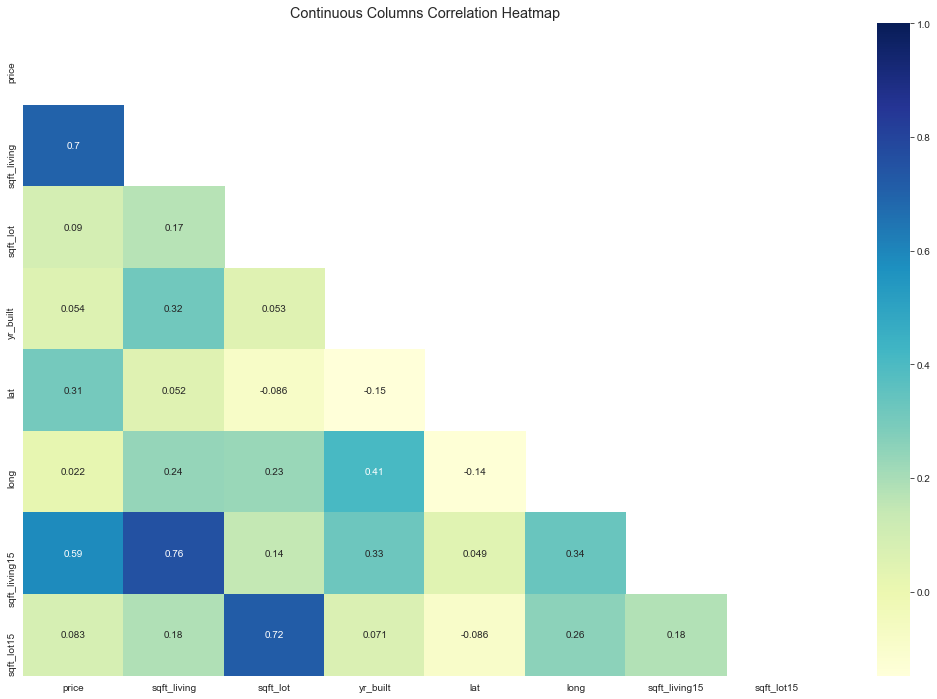

sqft_living  sqft_living15    0.756402
sqft_lot     sqft_lot15       0.718204
price        sqft_living      0.701917
             sqft_living15    0.585241
yr_built     long             0.409993
long         sqft_living15    0.335626
yr_built     sqft_living15    0.326377
sqft_living  yr_built         0.318152
price        lat              0.306692
long         sqft_lot15       0.255586
dtype: float64
Write column name you would like to get rid of (Enter "x" to exit): sqft_living15
'sqft_living15' has been DELETED!
There are now 19 columns in the data.


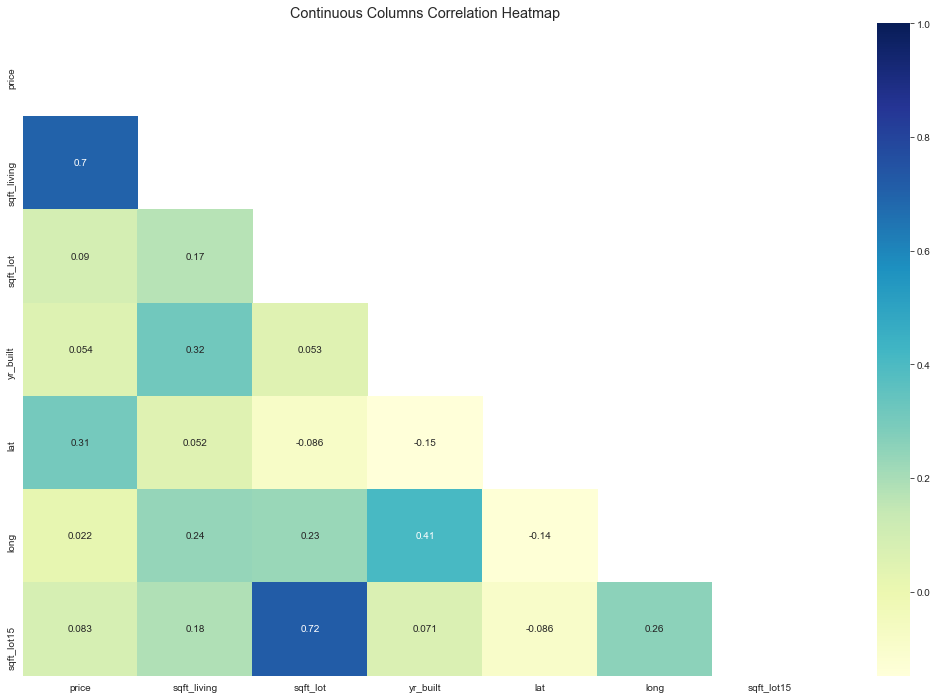

sqft_lot     sqft_lot15     0.718204
price        sqft_living    0.701917
yr_built     long           0.409993
sqft_living  yr_built       0.318152
price        lat            0.306692
long         sqft_lot15     0.255586
sqft_living  long           0.241214
sqft_lot     long           0.230227
sqft_living  sqft_lot15     0.184342
             sqft_lot       0.173453
dtype: float64
Write column name you would like to get rid of (Enter "x" to exit): sqft_lot15
'sqft_lot15' has been DELETED!
There are now 18 columns in the data.


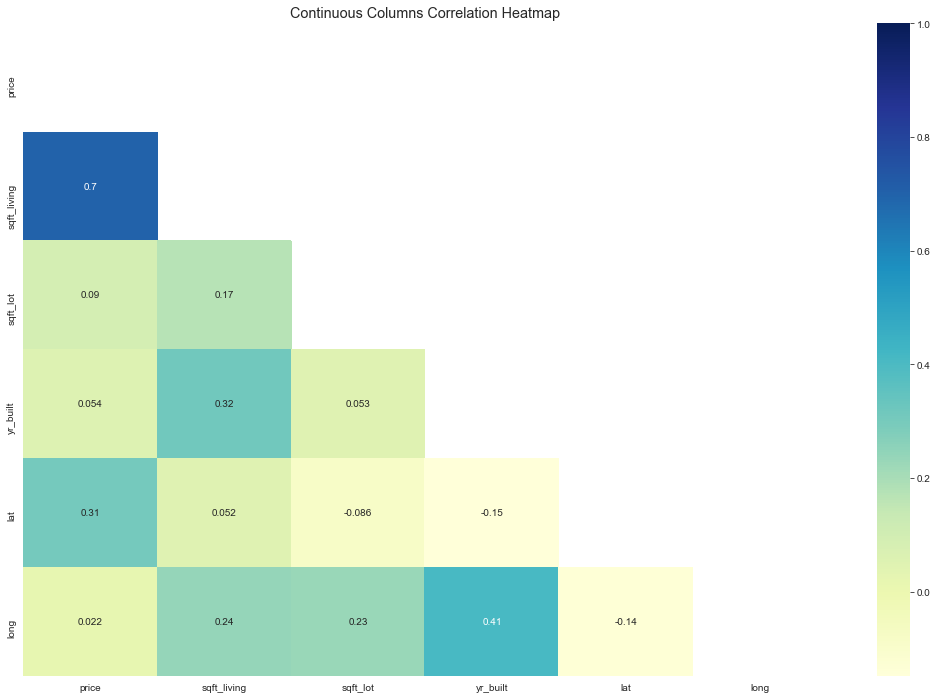

price        sqft_living    0.701917
yr_built     long           0.409993
sqft_living  yr_built       0.318152
price        lat            0.306692
sqft_living  long           0.241214
sqft_lot     long           0.230227
sqft_living  sqft_lot       0.173453
yr_built     lat            0.148370
lat          long           0.135371
price        sqft_lot       0.089876
dtype: float64
Write column name you would like to get rid of (Enter "x" to exit): x
Exiting!
There are 18 columns remaining in the data


In [50]:
model1.multicolinearity(option='cont')

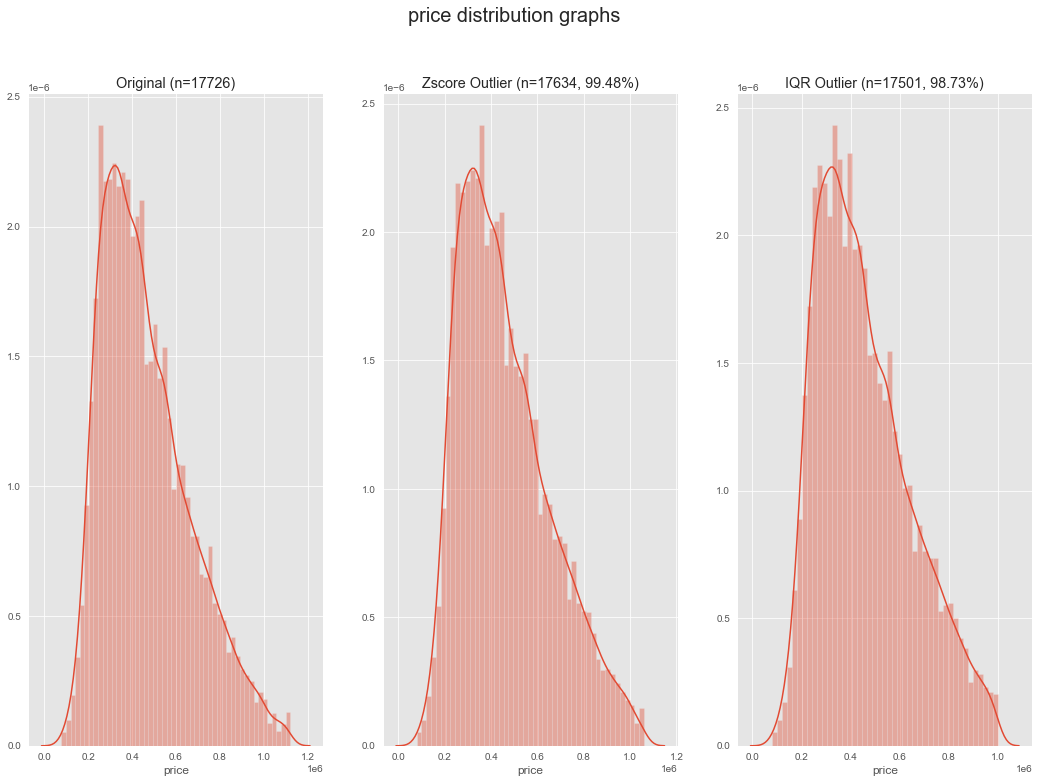

Choose an option (1) none (2) zscore method (3) IQR method (4) Drop column: 1
nothing has changed.


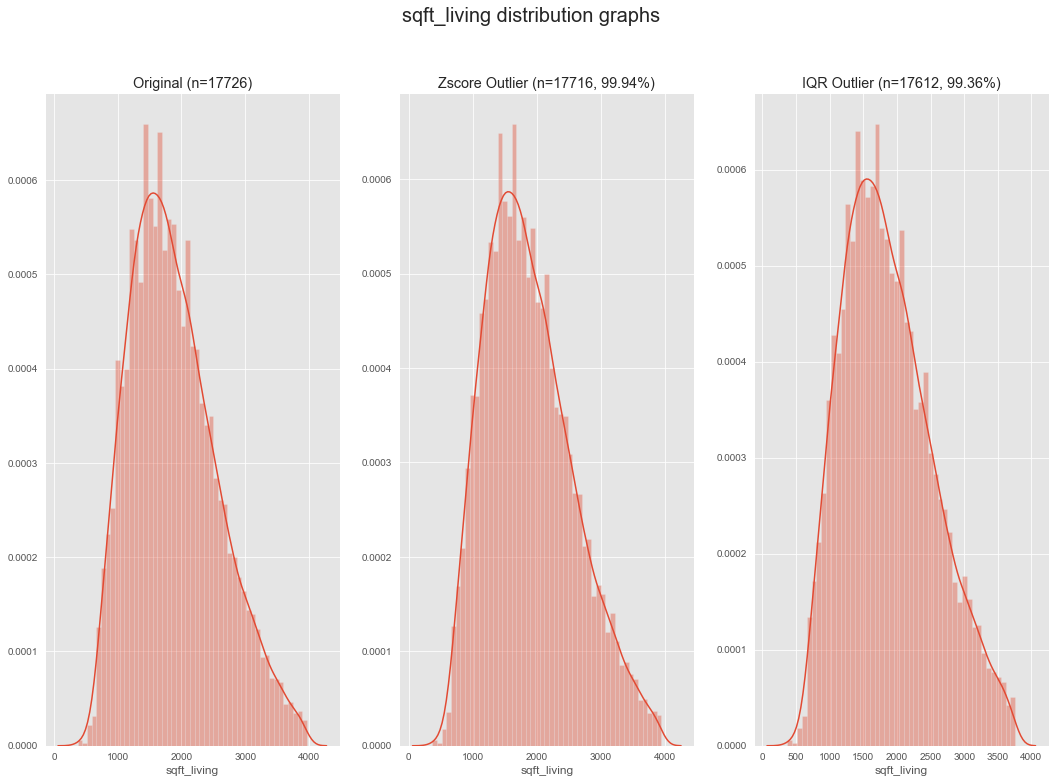

Choose an option (1) none (2) zscore method (3) IQR method (4) Drop column: 1
nothing has changed.


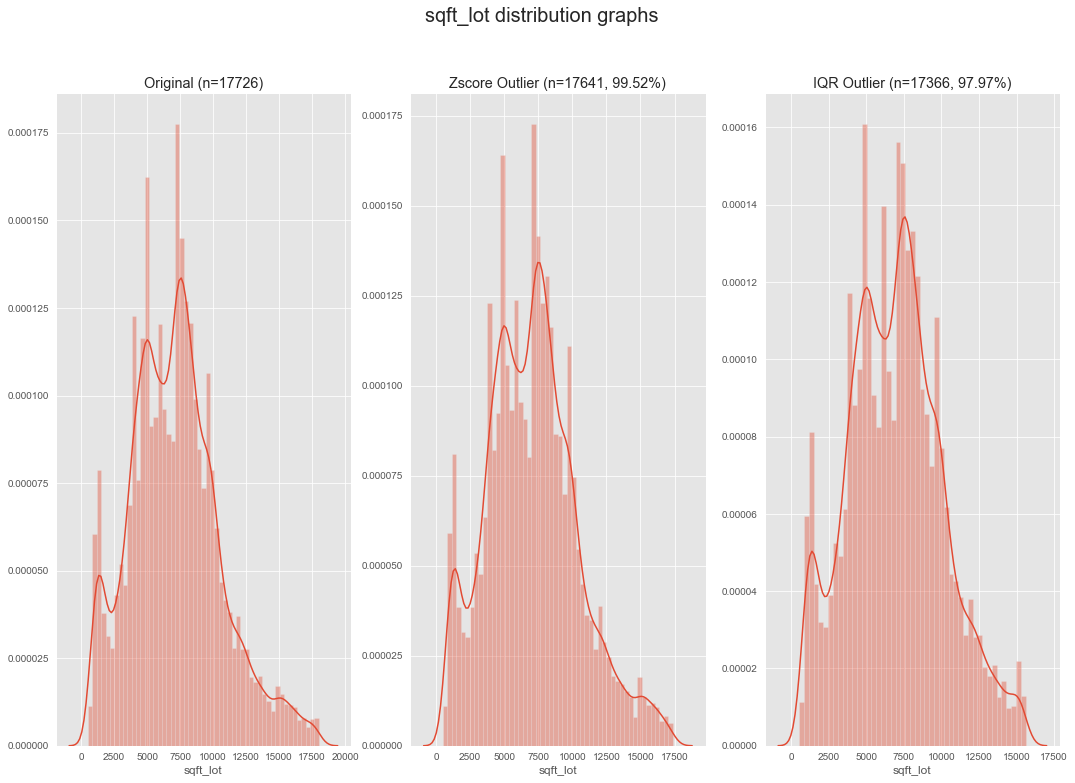

Choose an option (1) none (2) zscore method (3) IQR method (4) Drop column: 1
nothing has changed.


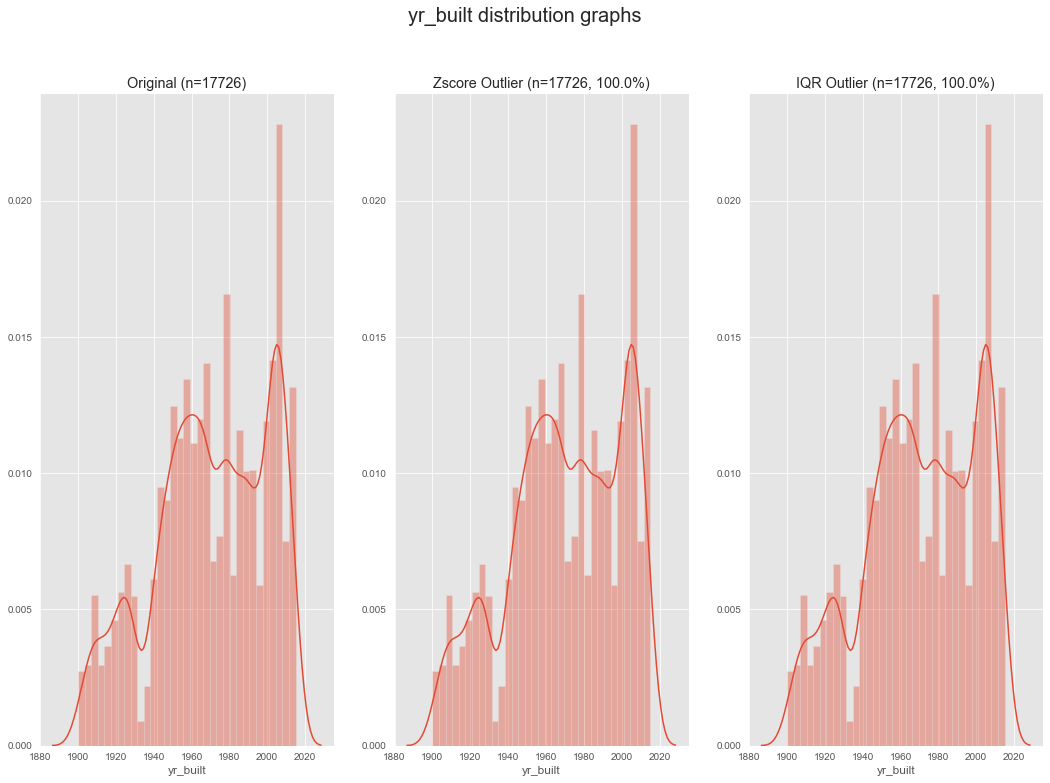

Choose an option (1) none (2) zscore method (3) IQR method (4) Drop column: 1
nothing has changed.


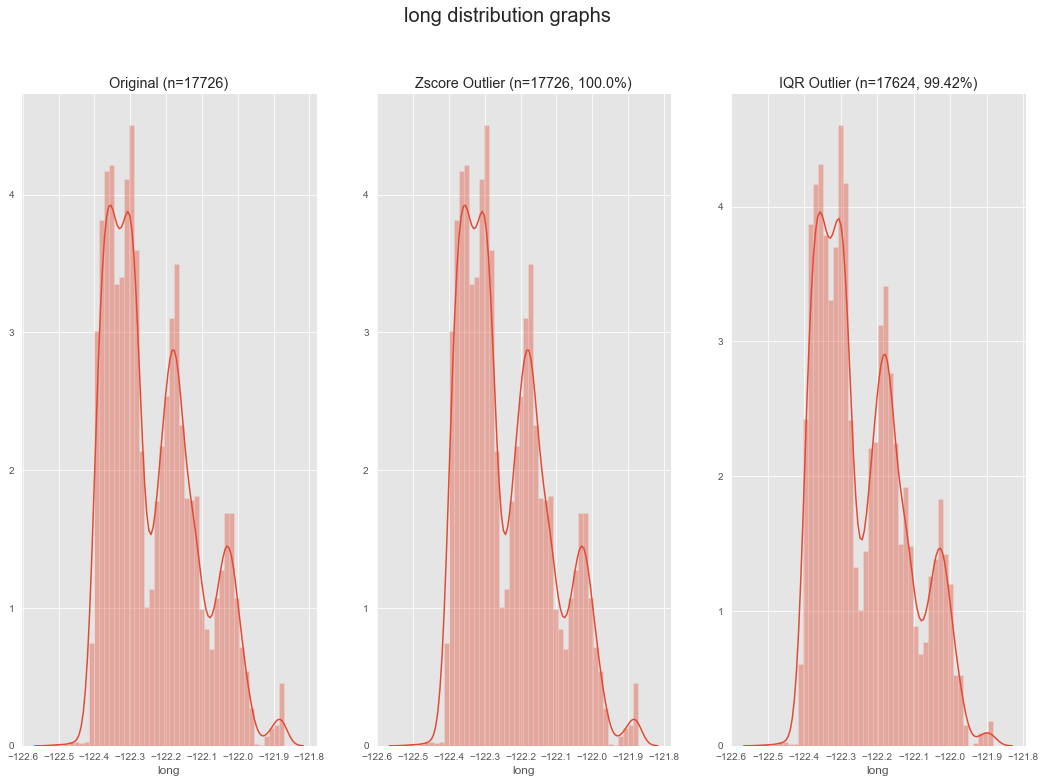

Choose an option (1) none (2) zscore method (3) IQR method (4) Drop column: 4
'long' has been DELETED!
There are now 16 columns in the data.


In [53]:
cols = model1.cont_cols
for col in cols:
    model1.outlier(col)

In [23]:
model1.cont_cols

['price', 'sqft_living', 'sqft_lot', 'yr_built', 'long']

> Based on this correlation map, we can conclude that
    - All sqft related variables are closely related.
> We will take sqft_living 

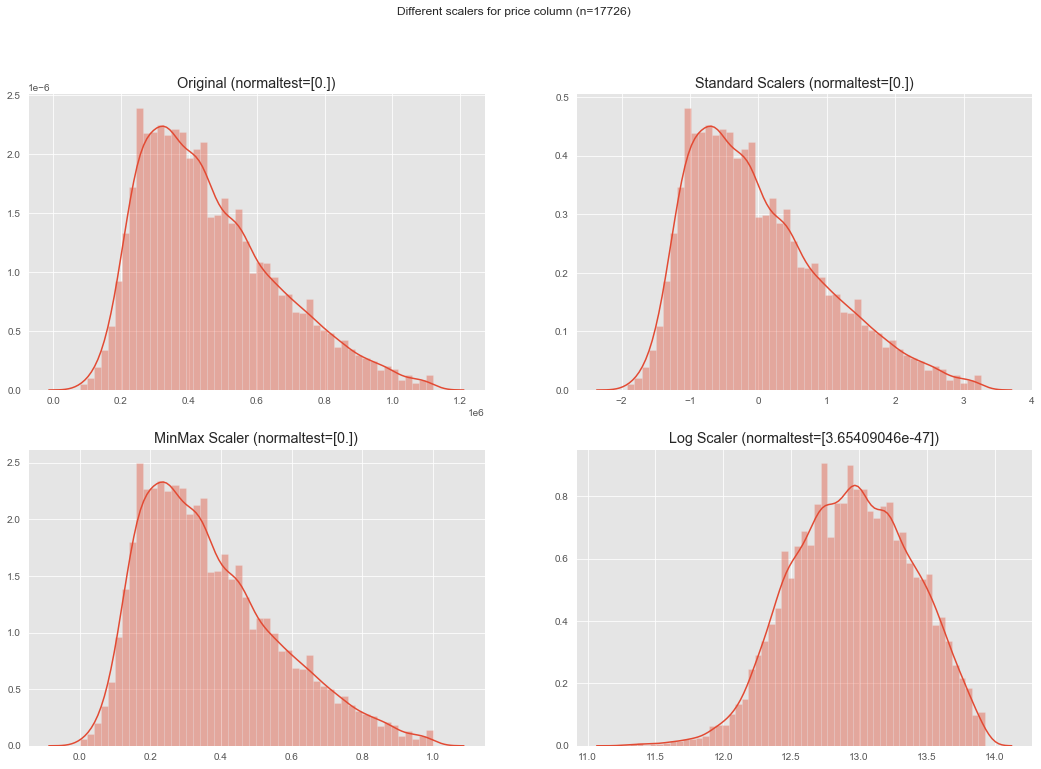

Choose an option (1) none (2) standard (3) min_max (4) logarithmic: 4


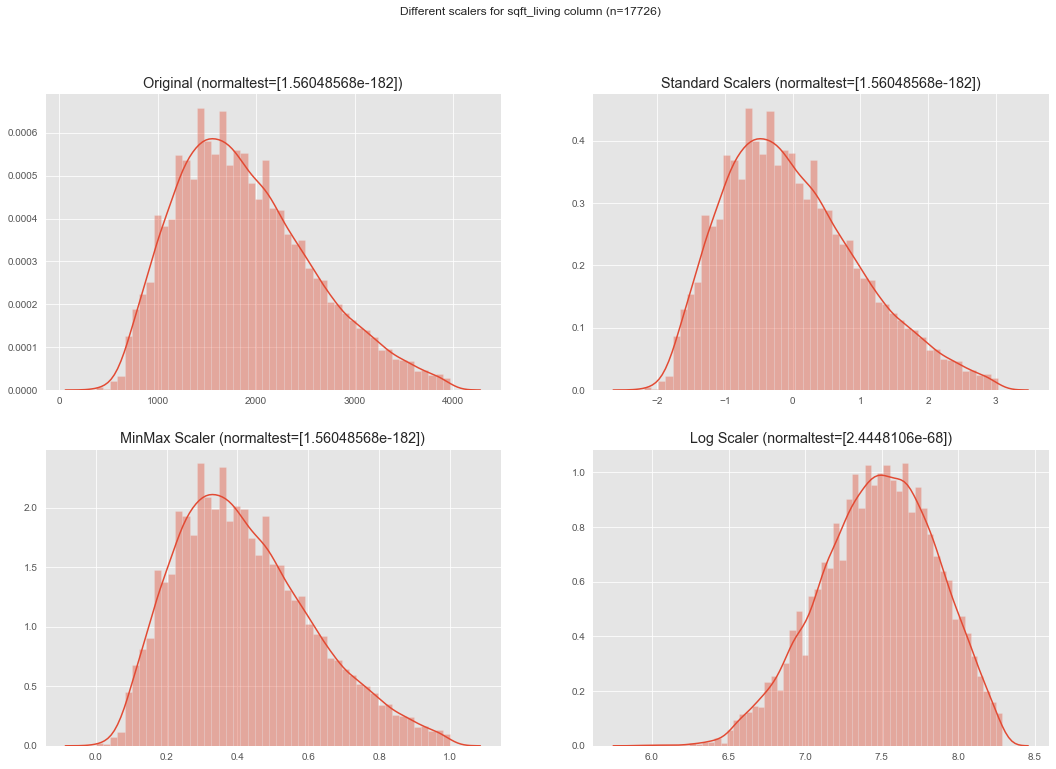

Choose an option (1) none (2) standard (3) min_max (4) logarithmic: 4


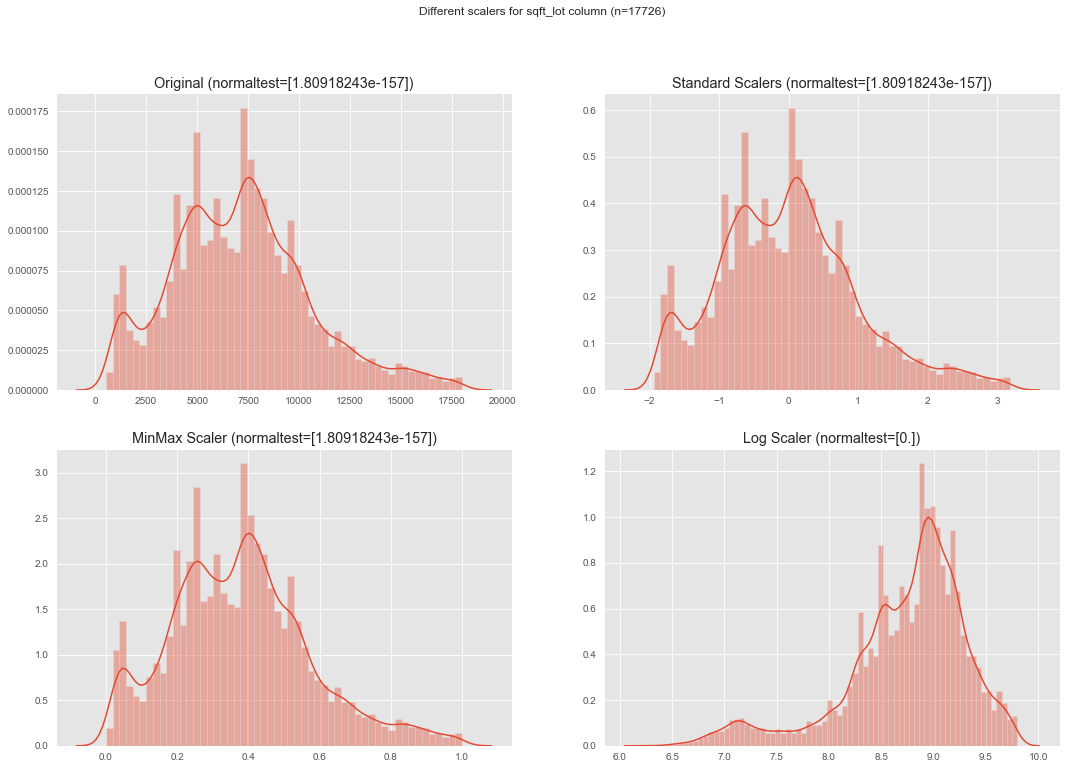

Choose an option (1) none (2) standard (3) min_max (4) logarithmic: 4


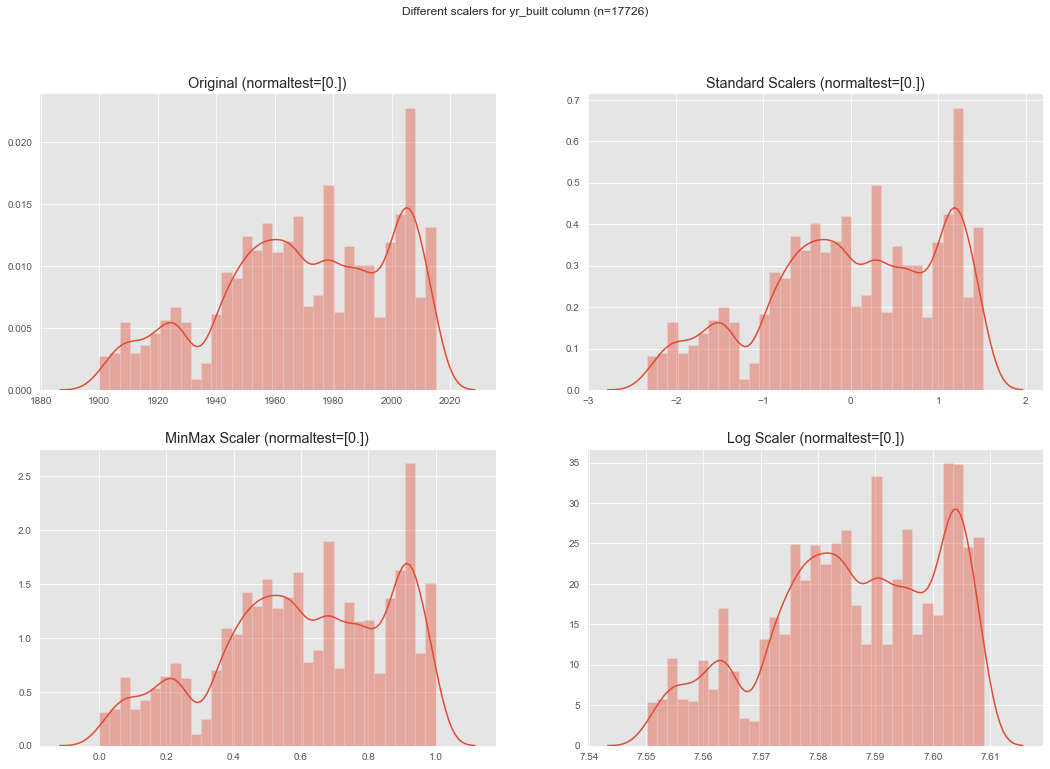

Choose an option (1) none (2) standard (3) min_max (4) logarithmic: 1
Nothing has changed.


In [54]:
cols = model1.cont_cols
for col in cols:
    model1.scaler(col)

In [64]:
model1.X = model1.data[model1.cont_cols].drop(columns='price')
model1.y = model1.data[model1.target]

In [65]:
model1.split()

Shape of X_train: (13294, 3)
Shape of X_test: (4432, 3)
Shape of y_train: (13294,)
Shape of y_test: (4432,)


In [66]:
features = ' + '.join(model1.X_train.columns)
features

'sqft_living + sqft_lot + yr_built'

In [67]:
formula = 'price ~ '+features
formula

'price ~ sqft_living + sqft_lot + yr_built'

In [74]:
formula = model1.get_formula()
formula

'price ~ sqft_living + sqft_lot + yr_built'

In [75]:
model = model1.regression(formula)

In [76]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.407
Model:                            OLS   Adj. R-squared:                  0.407
Method:                 Least Squares   F-statistic:                     3040.
Date:                Wed, 16 Sep 2020   Prob (F-statistic):               0.00
Time:                        23:47:03   Log-Likelihood:                -4486.9
No. Observations:               13294   AIC:                             8982.
Df Residuals:                   13290   BIC:                             9012.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      15.8437      0.208     76.108      0.000      15.436      16.252
sqft_living     0.8291      0.009     95.124      0.000       0.812       0.846
sqft_lot       -0.1898      0.005    -36.555      0.000      -0.200      -0.180
yr_built       -0.0038      0.000    -35.035      0.000      -0.004      -0.004
==============================================================================
Omnibus:                      102.013   Durbin-Watson:                   1.986
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               97.071
Skew:                          -0.181   Prob(JB):                     8.34e-22
Kurtosis:                       2.789   Cond. No.                     1.39e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.39e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Train MSE = 0.11499720229206366	Train R2 = 0.40697296003816763
Test MSE = 0.1129393451294835	Test R2 = 0.4184830674145358


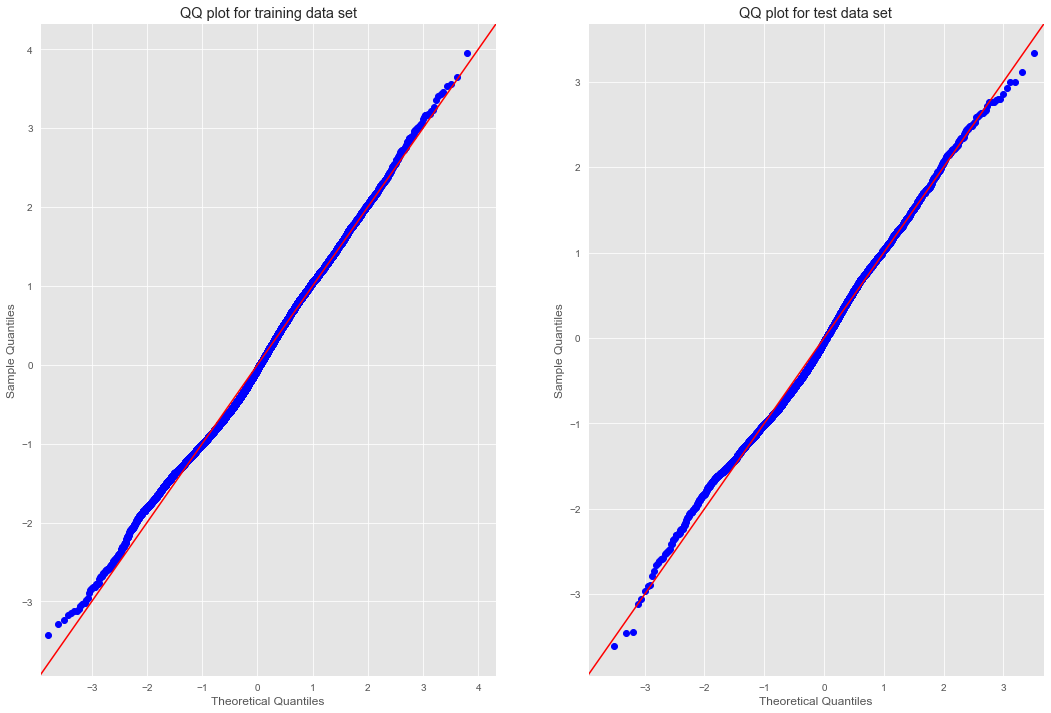

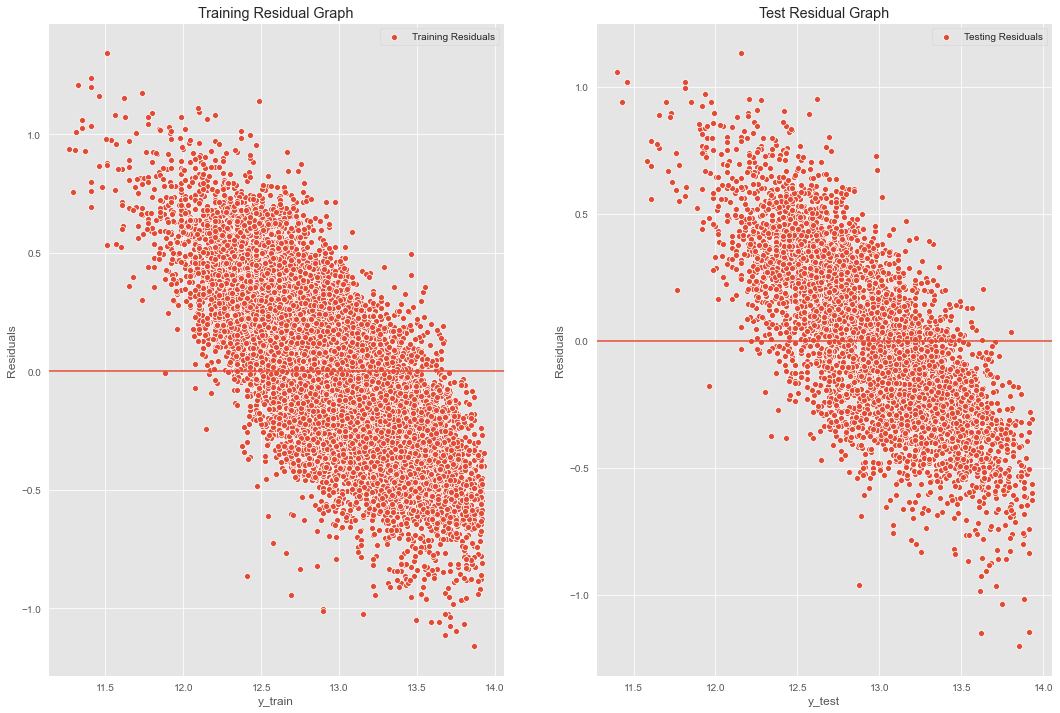

In [83]:
model1.validate_model()

# Model #2

In [85]:
# import 'kc_house_data.csv'
df = pd.read_csv('kc_house_data.csv')
# len(df.columns)

# Uncomment and execute the following lines of the codes to skip determining cat/cont columns:
# predetermed categorical colums:
cat_cols = ['id', 'bedrooms','bathrooms','floors','waterfront','view','condition','grade','yr_renovated','zipcode']
# predetermed continuous colums:
cont_cols = ['price','sqft_living','sqft_lot','sqft_above','yr_built','lat','long','sqft_living15','sqft_lot15']

In [108]:
model2 = MakeModel(df)

In [109]:
model2.count_na()

yr_renovated     3842
waterfront       2376
view               63
sqft_lot15          0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
condition           0
sqft_living15       0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
zipcode             0
lat                 0
long                0
id                  0
dtype: int64


> Changes:
    - waterfront: fillna with 0.
    - yr_renovated: boolean where 1 means renovated and 0 means not renovated. fill na's with 0s.
    - yr_built: make a new column called age = current year - yr_built
    - view: fillna with mode (0.0)

In [140]:
# waterfront: fillnas with 0s. view:fillnas with mode
model2.imuter('waterfront', option=0)
model2.imuter('view', option='mode')


Number of nulls:  0
None


In [144]:
model2.count_na()

yr_renovated     3842
sqft_lot15          0
view                0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront          0
condition           0
sqft_living15       0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
zipcode             0
lat                 0
long                0
id                  0
dtype: int64


In [154]:
# yr_renovated into booleans
model2.data['yr_renovated'] = model2.data['yr_renovated']>1000

In [156]:
# Create a new column 'age' and drop 'yr_built'
model2.data['age'] = 2019 - model2.data['yr_built']
model2.data.drop(columns='yr_built', axis=1, inplace=True)

In [157]:
model2.data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'age'],
      dtype='object')